## FanGraphs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.width = 0
pd.options.display.max_colwidth = 100
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
FANGRAPHS_URL = 'https://www.fangraphs.com/api/leaders/major-league/data'

In [4]:
pos = 'all'
stats = 'bat'
lg = 'all'
qual = 0
ind = 0
team = '0%2Cts'
rost = ''
filter = ''
players = 0
month = '{month}'
season1 = '{season1}'
season = '{season}'

payload = {'pos': pos, 'stats': stats, 'lg': lg, 'qual': qual, 'ind': ind, 'team': team, 'rost': rost, 'filter': filter, 'players': players, 'season1': season, 'season': season, 'type': 8, 'month': month}
n = 0
PARAMS = '?'
for key, value in payload.items():
    PARAMS += key + '=' + str(value)
    if n < len(payload.items()) - 1:
        PARAMS += '&'
    n += 1

df = pd.DataFrame()
for y in range(2002, 2025):
    #home = pd.json_normalize(requests.get(FANGRAPHS_URL + '?pos=all&stats=bat&lg=all&qual=0&team=0%2Cts&season1={year}&season={year}&month=15'.format(year=y)).json(), record_path=['data'])
    home = pd.json_normalize(requests.get((FANGRAPHS_URL + PARAMS).format(season=y, month=15)).json(), record_path=['data']).assign(HomeAway='Home')
    away = pd.json_normalize(requests.get((FANGRAPHS_URL + PARAMS).format(season=y, month=16)).json(), record_path=['data']).assign(HomeAway='Away')
    df = pd.concat([df, home, away])
df = df.sort_values(by=['Season', 'TeamName', 'HomeAway'])

In [5]:
col_df = df[df.TeamName == 'COL'][['Season', 'TeamName', 'HomeAway', 'wRC+']]

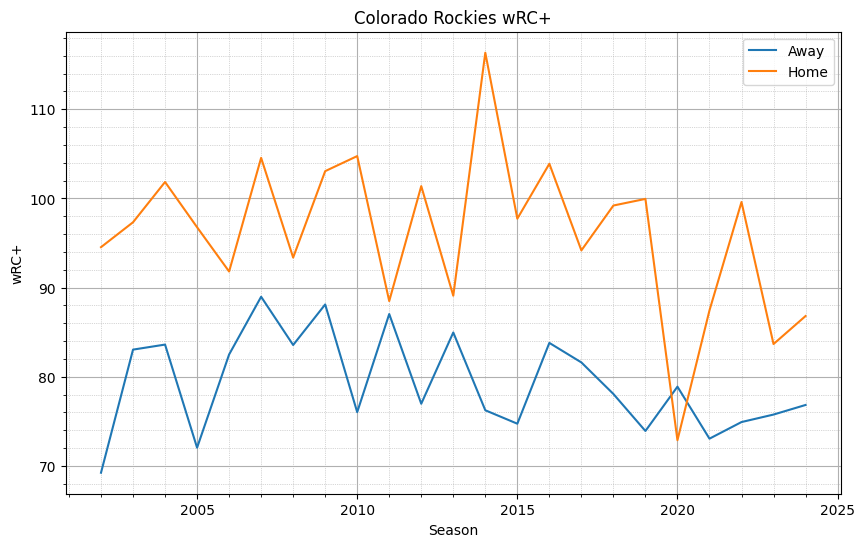

In [6]:
plt.figure(figsize=(10, 6))
for name, group in col_df.groupby('HomeAway'):
    plt.plot(group['Season'], group['wRC+'], '-', label=name)
plt.title('Colorado Rockies wRC+')
plt.xlabel('Season')
plt.ylabel('wRC+')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5)
plt.grid(which='major', linestyle='-', linewidth=0.8)
plt.show()

In [7]:
pos = 'np'
payload = {'pos': pos, 'stats': stats, 'lg': lg, 'qual': qual, 'ind': ind, 'team': team, 'rost': rost, 'filter': filter, 'players': players, 'season1': season1, 'season': season, 'type': 8, 'month': month}
n = 0
PARAMS = '?'
for key, value in payload.items():
    PARAMS += key + '=' + str(value)
    if n < len(payload.items()) - 1:
        PARAMS += '&'
    n += 1

home = pd.json_normalize(requests.get((FANGRAPHS_URL + PARAMS).format(season1=2002, season=2024, month=15)).json(), record_path=['data'])
away = pd.json_normalize(requests.get((FANGRAPHS_URL + PARAMS).format(season1=2002, season=2024, month=16)).json(), record_path=['data'])

In [8]:
df = pd.merge(home[['TeamName', 'wRC+']], away[['TeamName', 'wRC+']], on=['TeamName'])
df['wRC+ Gap'] = df['wRC+_x'] - df['wRC+_y']
df = df.sort_values(by=['wRC+ Gap'], ascending=False)

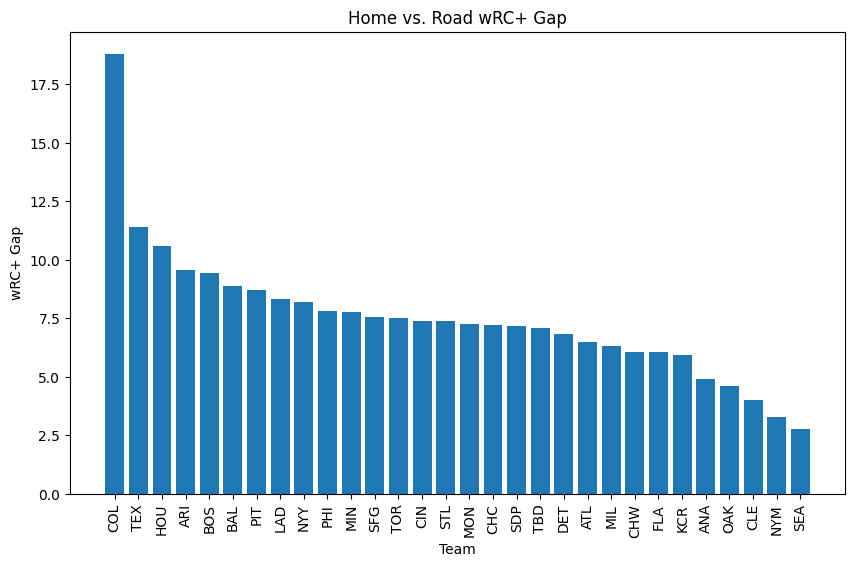

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(df['TeamName'], df['wRC+ Gap'])
plt.title('Home vs. Road wRC+ Gap')
plt.xlabel('Team')
plt.ylabel('wRC+ Gap')
plt.xticks(rotation=90)
plt.show()